# FFT Example

This is an example of how to implement the FFT of a signal with multiple frequency components and some noise.

> Provided as supplemental material for [Marshall Bruner](https://www.youtube.com/@MarshallBrunerRF)'s [series about FMCW Radar on YouTube](https://www.youtube.com/playlist?list=PLPQrZqhah1qGvTfkslUUSC1YRa4i1jHTO).

- GitHub: https://github.com/brunerm99
- YouTube: https://www.youtube.com/@MarshallBrunerRF

## Imports

In [12]:
from numpy.fft import fft, fftshift
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.constants import pi

plt.style.use("ggplot")

## Noise

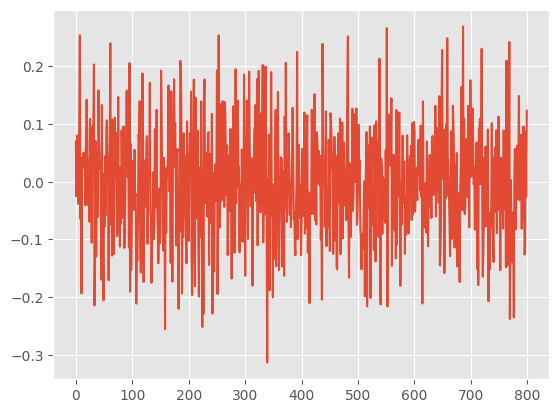

In [13]:
stop_time = 16 # s
fs = 50 # Hz
N = fs * stop_time
t = np.linspace(0, stop_time, N)

noise_mu = 0
noise_sigma_db = -10 # dB
noise_sigma = 10 ** (noise_sigma_db / 10)

noise = np.random.normal(loc=noise_mu, scale=noise_sigma, size=t.size)
plt.plot(noise)

## Creating time-series signal, $x[n]$, with 3 targets, some noise, and applying a Blackman window to it

(6.0, 10.0)

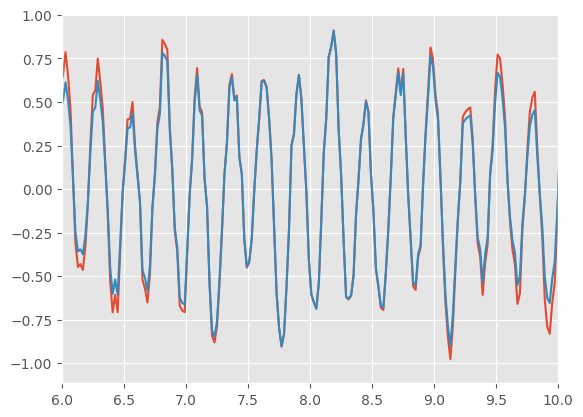

In [14]:
f1 = 1.5 # Hz
f2 = 2.7 # Hz
f_clutter = 3.7 # Hz
power_norm_1 = -6 # dB
power_norm_2 = -9 # dB
power_norm_clutter = 0 # dB
A_1 = 10 ** (power_norm_1 / 10)
A_2 = 10 ** (power_norm_2 / 10)
A_clutter = 10 ** (power_norm_clutter / 10)


x_n = (
    A_1 * np.sin(2 * pi * f1 * t)
    + A_2 * np.sin(2 * pi * f2 * t)
    + A_clutter * np.sin(2 * pi * f_clutter * t)
    + noise
) / (A_1 + A_2 + A_clutter + noise_sigma)

blackman_window = signal.windows.blackman(N)
x_n_windowed = x_n * blackman_window

plt.plot(t, x_n)
plt.plot(t, x_n_windowed)
# plt.plot(t, blackman_window)
plt.xlim(6, 10)

## The window function

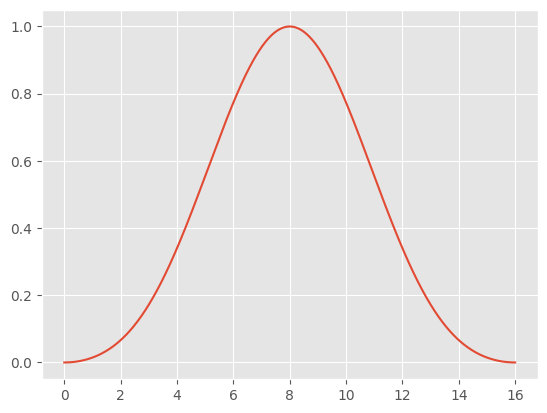

In [15]:
plt.plot(t, blackman_window)

## Applying FFT to $x[n]$, normalizing it, and getting into log scale

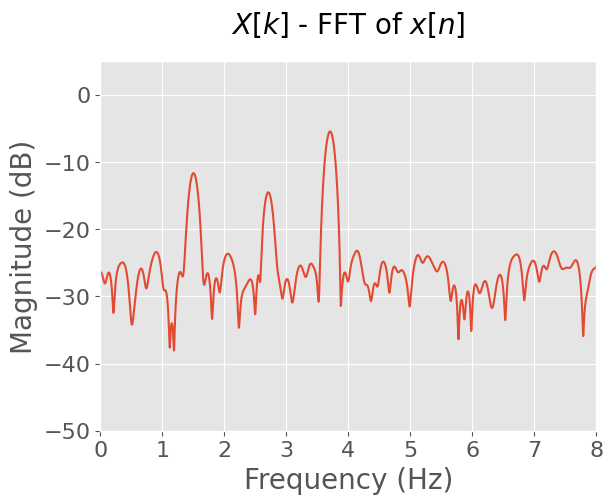

NameError: name 'fig' is not defined

In [16]:
fft_len = 2**20

X_k = fftshift(fft(x_n_windowed, fft_len))
X_k /= N / 2
X_k = np.abs(X_k)
X_k = 10 * np.log10(X_k)

freq = np.linspace(-fs / 2, fs / 2, fft_len)

plt.plot(freq, X_k)
plt.xlim(0, 8)
plt.ylim(-50, 5)
plt.title("$X[k]$ - FFT of $x[n]$", fontsize=20, pad=20)
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude (dB)")
plt.xlabel("Frequency (Hz)", fontsize=20)
plt.ylabel("Magnitude (dB)", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.axes().set_axis_off()
plt.show()
fig.savefig(
    "figures/cfar_nb_transparent.png", dpi=300, transparent=True, bbox_inches="tight"
)